This model predicts class of pulsar star based on some received information about it.

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix



from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [41]:
data = pd.read_csv("/Users/maxkucher/data_handling/ML_projects/pulsars.csv")
data

,Mean_Integrated,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
0,140.562500,1.502969,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,0.788423,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,0.323558,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,0.958983,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,1.232198,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...
14982,96.000000,0.537495,0.281344,1.871237,15.833746,9.634927,104.821623,0
14983,136.429688,1.349991,-0.738123,1.296823,12.166062,15.450260,285.931022,0
14984,122.554688,0.316006,0.323061,16.409699,44.626893,2.945244,8.297092,0
14985,119.335938,0.213253,-0.743025,21.430602,58.872000,2.499517,4.595173,0


In [42]:
scaler = MinMaxScaler()
columns_to_scale = ["Mean_Integrated", "EK", "Skewness", "Mean_DMSNR_Curve", "SD_DMSNR_Curve", "EK_DMSNR_Curve", "Skewness_DMSNR_Curve"]
for column in columns_to_scale:
    data[column] = scaler.fit_transform(data[[column]])

In [43]:
data.isnull().sum()

Mean_Integrated         0
EK                      0
Skewness                0
Mean_DMSNR_Curve        0
SD_DMSNR_Curve          0
EK_DMSNR_Curve          0
Skewness_DMSNR_Curve    0
Class                   0
dtype: int64

In [44]:
data

,Mean_Integrated,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
0,0.688724,0.237231,0.093259,0.032276,0.175419,0.449559,0.207228,0
1,0.428159,0.124443,0.127147,0.012999,0.093973,0.585135,0.352398,0
2,0.431636,0.051066,0.414737,0.031281,0.225897,0.437064,0.176993,0
3,0.662619,0.151365,0.104902,0.037887,0.210847,0.393314,0.150832,0
4,0.333797,0.194491,0.428017,0.006690,0.028986,0.777638,0.694279,0
...,...,...,...,...,...,...,...,...
14982,0.383599,0.084835,0.273385,0.015455,0.112630,0.536055,0.290748,0
14983,0.660426,0.213084,0.086195,0.008183,0.042349,0.839182,0.785404,0
14984,0.565422,0.049874,0.281045,0.199522,0.664373,0.187353,0.027116,0
14985,0.543383,0.033655,0.085294,0.263089,0.937342,0.164120,0.017005,0


In [45]:
x = data.drop("Class", axis="columns")
y = data["Class"]

In [46]:
# chosen method
cross_val_score(KNeighborsClassifier(), x, y)

array([0.9826551 , 0.98498999, 0.98665332, 0.98365032, 0.98598599])

In [47]:
# cross_val_score(LogisticRegression(), x, y)

In [48]:
# cross_val_score(RandomForestClassifier(), x, y)

In [49]:
# cross_val_score(SVC(), x, y)

In [50]:
# cross_val_score(DecisionTreeClassifier(), x, y)

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [52]:
model = KNeighborsClassifier(9)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [53]:
model.score(x_test, y_test)

0.985657104736491

In [54]:
preds = model.predict(x_test)
pred_data = pd.DataFrame({"Predictions": preds.squeeze(), "Actuals": y_test.squeeze()})
pred_data

,Predictions,Actuals
460,0,0
7869,0,0
10735,0,1
3669,0,0
8366,0,0
...,...,...
13719,0,0
10237,0,0
8650,0,1
5501,0,0


In [55]:
data["Predictions"] = model.predict(x)

In [56]:
data

,Mean_Integrated,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class,Predictions
0,0.688724,0.237231,0.093259,0.032276,0.175419,0.449559,0.207228,0,0
1,0.428159,0.124443,0.127147,0.012999,0.093973,0.585135,0.352398,0,0
2,0.431636,0.051066,0.414737,0.031281,0.225897,0.437064,0.176993,0,0
3,0.662619,0.151365,0.104902,0.037887,0.210847,0.393314,0.150832,0,0
4,0.333797,0.194491,0.428017,0.006690,0.028986,0.777638,0.694279,0,0
...,...,...,...,...,...,...,...,...,...
14982,0.383599,0.084835,0.273385,0.015455,0.112630,0.536055,0.290748,0,0
14983,0.660426,0.213084,0.086195,0.008183,0.042349,0.839182,0.785404,0,0
14984,0.565422,0.049874,0.281045,0.199522,0.664373,0.187353,0.027116,0,0
14985,0.543383,0.033655,0.085294,0.263089,0.937342,0.164120,0.017005,0,0


In [57]:
cm = confusion_matrix(preds, y_test)
cm

array([[2934,   38],
       [   5,   21]])

Text(50.722222222222214, 0.5, 'Actuals')

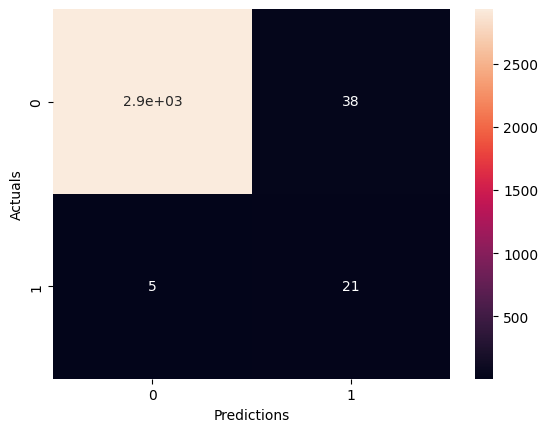

In [58]:
sn.heatmap(cm, annot=True)
plt.xlabel("Predictions")
plt.ylabel("Actuals")
